https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/

## Import Libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

## Import Dataset

In [2]:
apple_training_complete = pd.read_csv(r'apple_training.csv')  

In [3]:
apple_training_complete.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.923737,140129500


In [11]:
len(apple_training_complete)

1259

In [4]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [6]:
apple_training_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

## Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [8]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
apple_training_scaled

array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

## Convert Training Data to Right Shape

In [13]:
features_set = []  
labels = []  
for i in range(60, len(apple_training_scaled)):  
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [14]:
features_set

[array([0.19795893, 0.19086893, 0.17784673, 0.15997849, 0.16858435,
        0.16057534, 0.16779659, 0.15878493, 0.13691814, 0.13169014,
        0.12732155, 0.1460253 , 0.13195271, 0.1391621 , 0.14423488,
        0.08597518, 0.07605635, 0.059513  , 0.08418477, 0.08239435,
        0.08237052, 0.08491287, 0.07870612, 0.06693722, 0.08176175,
        0.0898544 , 0.10268561, 0.10566959, 0.10926234, 0.09458105,
        0.09137026, 0.09653853, 0.08728814, 0.08321794, 0.06926475,
        0.07314397, 0.07863453, 0.0666627 , 0.07216522, 0.06693722,
        0.05971593, 0.04754117, 0.03999762, 0.05555025, 0.04360229,
        0.0499284 , 0.0498687 , 0.05685129, 0.04831701, 0.05354501,
        0.05963236, 0.06383384, 0.08537839, 0.08289565, 0.07430177,
        0.07950586, 0.09157316, 0.0924684 , 0.08174982, 0.07382432]),
 array([0.19086893, 0.17784673, 0.15997849, 0.16858435, 0.16057534,
        0.16779659, 0.15878493, 0.13691814, 0.13169014, 0.12732155,
        0.1460253 , 0.13195271, 0.1391621 , 0.

In [15]:
labels

[0.06437096524008734,
 0.04730243705357828,
 0.05180234750655088,
 0.054655043837102846,
 0.043602287875374235,
 0.04402004031976592,
 0.045822402447944666,
 0.04789925848711363,
 0.05460729377770779,
 0.05512053798567362,
 0.04658629478045906,
 0.04010502840710772,
 0.038553339469125425,
 0.02031509775414725,
 0.0,
 0.005574107152219565,
 0.019121496663156545,
 0.00664837069319435,
 0.027763187946030277,
 0.026068265540294455,
 0.03876819384836361,
 0.05625447447926435,
 0.06742659305665677,
 0.06422772341711791,
 0.0756027484148799,
 0.08085458653106603,
 0.0919073759136585,
 0.084829296461988,
 0.08574837022112458,
 0.08355215992150777,
 0.07584147364620752,
 0.07863453044500768,
 0.06110050810992773,
 0.04209834064157114,
 0.0609691975353952,
 0.05244686886818539,
 0.059894959060068254,
 0.06693721970078059,
 0.05726904000197519,
 0.06311769955169677,
 0.07391980738887682,
 0.062103125673769966,
 0.06884699648575443,
 0.07702317690962535,
 0.07491046863863415,
 0.07788252758485004,

## convert both the "feature_set" and the "labels" list to the numpy array

In [16]:
features_set, labels = np.array(features_set), np.array(labels)

In [17]:
features_set

array([[0.19795893, 0.19086893, 0.17784673, ..., 0.0924684 , 0.08174982,
        0.07382432],
       [0.19086893, 0.17784673, 0.15997849, ..., 0.08174982, 0.07382432,
        0.06437097],
       [0.17784673, 0.15997849, 0.16858435, ..., 0.07382432, 0.06437097,
        0.04730244],
       ...,
       [0.8257937 , 0.82370489, 0.82052999, ..., 0.99214607, 0.99640719,
        0.96398904],
       [0.82370489, 0.82052999, 0.82512526, ..., 0.99640719, 0.96398904,
        0.95814041],
       [0.82052999, 0.82512526, 0.83172595, ..., 0.96398904, 0.95814041,
        0.96566005]])

In [18]:
labels

array([0.06437097, 0.04730244, 0.05180235, ..., 0.95814041, 0.96566005,
       0.96164958])

## In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format.

## the last dimension is the number of indicators. Since we are only using one feature, i.e Open, the number of indicators will be one

In [20]:
features_set.shape[0]

1199

In [22]:
features_set.shape[1]

60

In [23]:
features_set.shape

(1199, 60)

In [24]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1)) 

In [25]:
features_set.shape

(1199, 60, 1)

## Training The LSTM

## We have preprocessed our data and have converted it into the desired format. now is the time to create our LSTM. The LSTM model that we are going to create will be a sequential model with multiple layers. We will add four LSTM layers to our model followed by a dense layer that predicts the future stock price.

In [26]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout 

Using TensorFlow backend.


## In the script above we imported the Sequential class from keras.models library and Dense, LSTM, and Dropout classes from keras.layers library.

## As a first step, we need to instantiate the Sequential class. This will be our model class and we will add LSTM, Dropout and Dense layers to this model.

In [27]:
model = Sequential()  

## Creating LSTM and Dropout Layers
## Let's add LSTM layer to the model that we just created. Execute the following script to do so

In [29]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], features_set.shape[2])))  

## To add a layer to the sequential model, the add method is used. Inside the add method, we passed our LSTM layer. The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

## Let's now add a dropout layer to our model. Dropout layer is added to avoid over-fitting, which is a phenomenon where a machine learning model performs better on the training data compared to the test data. Execute the following script to add dropout layer.

In [30]:
model.add(Dropout(0.2)) 

## Let's add three more LSTM and dropout layers to our model. Run the following script.

In [31]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

## Creating Dense Layer
## To make our model more robust, we add a dense layer at the end of the model. The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output.

In [32]:
model.add(Dense(units = 1))

## Model Compilation
## Finally, we need to compile our LSTM before we can train it on the training data. The following script compiles the our model.

In [33]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

## We call the compile method on the Sequential model object which is "model" in our case. We use the mean squared error as loss function and to reduce the loss or to optimize the algorithm, we use the adam optimizer.

## Algorithm Training
## Now is the time to train the model that we defined in the previous few steps. To do so, we call the fit method on the model and pass it our training features and labels as shown below:

In [34]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  

Epoch 1/100
1199/1199 [==============================] - 14s 12ms/step - loss: 0.0432
Epoch 2/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 3/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0055
Epoch 4/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 5/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0052
Epoch 6/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 7/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 8/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 9/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 10/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 11/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 12/100
1199/1199 [==============================] - 4s 3ms/step - 

1199/1199 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 98/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 99/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0010
Epoch 100/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0013


## Testing our LSTM

In [36]:
apple_testing_complete = pd.read_csv(r'apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

In [39]:
apple_testing_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,169.712067,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,169.682510,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,170.470703,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,172.411560,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.771179,20567800
5,2018-01-09,174.550003,175.059998,173.410004,174.330002,171.751465,21584000
6,2018-01-10,173.160004,174.300003,173.000000,174.289993,171.712051,23959900
7,2018-01-11,174.589996,175.490005,174.490005,175.279999,172.687408,18667700
8,2018-01-12,176.179993,177.360001,175.649994,177.089996,174.470642,25226000
9,2018-01-16,177.899994,179.389999,176.139999,176.190002,173.583969,29565900


In [37]:
apple_testing_processed

array([[170.160004],
       [172.529999],
       [172.539993],
       [173.440002],
       [174.350006],
       [174.550003],
       [173.160004],
       [174.589996],
       [176.179993],
       [177.899994],
       [176.149994],
       [179.369995],
       [178.610001],
       [177.300003],
       [177.300003],
       [177.25    ],
       [174.509995],
       [172.      ],
       [170.160004],
       [165.529999],
       [166.869995]])

In [38]:
len(apple_testing_processed)

21

In [40]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0) 

In [41]:
apple_total

0        79.117142
1        78.268570
2        76.709999
3        74.571426
4        75.601425
5        74.642860
6        75.507141
7        74.428574
8        71.811432
9        71.185715
10       70.662857
11       72.901428
12       71.217140
13       72.080002
14       72.687141
15       65.714287
16       64.527145
17       62.547142
18       65.500000
19       65.285713
20       65.282860
21       65.587143
22       64.844284
23       63.435715
24       65.209999
25       66.178574
26       67.714287
27       68.071426
28       68.501427
29       66.744286
           ...    
1250    174.880005
1251    175.029999
1252    174.869995
1253    174.169998
1254    174.679993
1255    170.800003
1256    170.100006
1257    171.000000
1258    170.520004
0       170.160004
1       172.529999
2       172.539993
3       173.440002
4       174.350006
5       174.550003
6       173.160004
7       174.589996
8       176.179993
9       177.899994
10      176.149994
11      179.369995
12      178.

In [58]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [59]:
test_inputs

array([154.179993, 154.970001, 155.809998, 156.059998, 155.970001,
       156.350006, 156.729996, 157.899994, 159.779999, 160.419998,
       156.75    , 156.610001, 156.889999, 156.289993, 156.910004,
       157.229996, 159.289993, 163.889999, 167.899994, 169.869995,
       166.600006, 174.      , 172.369995, 173.910004, 174.660004,
       175.110001, 175.110001, 173.5     , 173.039993, 169.970001,
       171.179993, 171.039993, 170.289993, 170.779999, 173.360001,
       175.100006, 175.050003, 174.300003, 172.630005, 170.429993,
       169.949997, 172.479996, 169.059998, 167.5     , 169.029999,
       170.490005, 169.199997, 172.149994, 172.5     , 172.399994,
       173.630005, 174.880005, 175.029999, 174.869995, 174.169998,
       174.679993, 170.800003, 170.100006, 171.      , 170.520004,
       170.160004, 172.529999, 172.539993, 173.440002, 174.350006,
       174.550003, 173.160004, 174.589996, 176.179993, 177.899994,
       176.149994, 179.369995, 178.610001, 177.300003, 177.300

In [60]:
len(test_inputs)

81

In [61]:
test_inputs.shape

(81,)

In [62]:
test_inputs = test_inputs.reshape(-1,1)  

In [63]:
test_inputs.shape

(81, 1)

In [64]:
test_inputs

array([[154.179993],
       [154.970001],
       [155.809998],
       [156.059998],
       [155.970001],
       [156.350006],
       [156.729996],
       [157.899994],
       [159.779999],
       [160.419998],
       [156.75    ],
       [156.610001],
       [156.889999],
       [156.289993],
       [156.910004],
       [157.229996],
       [159.289993],
       [163.889999],
       [167.899994],
       [169.869995],
       [166.600006],
       [174.      ],
       [172.369995],
       [173.910004],
       [174.660004],
       [175.110001],
       [175.110001],
       [173.5     ],
       [173.039993],
       [169.970001],
       [171.179993],
       [171.039993],
       [170.289993],
       [170.779999],
       [173.360001],
       [175.100006],
       [175.050003],
       [174.300003],
       [172.630005],
       [170.429993],
       [169.949997],
       [172.479996],
       [169.059998],
       [167.5     ],
       [169.029999],
       [170.490005],
       [169.199997],
       [172.1

In [65]:
test_inputs = scaler.transform(test_inputs)

In [66]:
test_inputs

array([[0.82512526],
       [0.83172595],
       [0.83874431],
       [0.84083311],
       [0.84008117],
       [0.84325619],
       [0.84643109],
       [0.85620667],
       [0.87191452],
       [0.87726185],
       [0.84659823],
       [0.8454285 ],
       [0.84776795],
       [0.84275477],
       [0.84793509],
       [0.8506087 ],
       [0.86782042],
       [0.90625446],
       [0.93975883],
       [0.95621862],
       [0.92889715],
       [0.9907257 ],
       [0.97710666],
       [0.98997377],
       [0.99624018],
       [1.        ],
       [1.        ],
       [0.98654809],
       [0.98270464],
       [0.95705419],
       [0.96716393],
       [0.9659942 ],
       [0.95972779],
       [0.9638219 ],
       [0.98537837],
       [0.99991649],
       [0.9994987 ],
       [0.99323229],
       [0.9792791 ],
       [0.96089752],
       [0.95688705],
       [0.97802574],
       [0.94945092],
       [0.9364168 ],
       [0.94920027],
       [0.96139894],
       [0.95062064],
       [0.975

In [67]:
len(test_inputs)

81

In [68]:
test_features = []  
for i in range(60, len(test_inputs)):  
    test_features.append(test_inputs[i-60:i, 0])

In [69]:
test_features

[array([0.82512526, 0.83172595, 0.83874431, 0.84083311, 0.84008117,
        0.84325619, 0.84643109, 0.85620667, 0.87191452, 0.87726185,
        0.84659823, 0.8454285 , 0.84776795, 0.84275477, 0.84793509,
        0.8506087 , 0.86782042, 0.90625446, 0.93975883, 0.95621862,
        0.92889715, 0.9907257 , 0.97710666, 0.98997377, 0.99624018,
        1.        , 1.        , 0.98654809, 0.98270464, 0.95705419,
        0.96716393, 0.9659942 , 0.95972779, 0.9638219 , 0.98537837,
        0.99991649, 0.9994987 , 0.99323229, 0.9792791 , 0.96089752,
        0.95688705, 0.97802574, 0.94945092, 0.9364168 , 0.94920027,
        0.96139894, 0.95062064, 0.9752685 , 0.97819288, 0.97735731,
        0.98763431, 0.99807833, 0.99933157, 0.9979947 , 0.99214607,
        0.99640719, 0.96398904, 0.95814041, 0.96566005, 0.96164958]),
 array([0.83172595, 0.83874431, 0.84083311, 0.84008117, 0.84325619,
        0.84643109, 0.85620667, 0.87191452, 0.87726185, 0.84659823,
        0.8454285 , 0.84776795, 0.84275477, 0.

In [71]:
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1)) 

In [73]:
test_features.shape

(21, 60, 1)

## Making Predictions

In [74]:
predictions = model.predict(test_features)  

In [76]:
predictions

array([[0.9432107 ],
       [0.944577  ],
       [0.9494464 ],
       [0.9554048 ],
       [0.960629  ],
       [0.96517897],
       [0.9687288 ],
       [0.96815944],
       [0.9671714 ],
       [0.971276  ],
       [0.9819769 ],
       [0.9899236 ],
       [0.9964511 ],
       [1.000977  ],
       [1.0004578 ],
       [0.99655706],
       [0.99315983],
       [0.98739356],
       [0.9758597 ],
       [0.96021014],
       [0.9393435 ]], dtype=float32)

In [77]:
predictions = scaler.inverse_transform(predictions) 

In [78]:
predictions

array([[168.31313],
       [168.47665],
       [169.05946],
       [169.7726 ],
       [170.39784],
       [170.94241],
       [171.36728],
       [171.29913],
       [171.18088],
       [171.67215],
       [172.9529 ],
       [173.90399],
       [174.68524],
       [175.22693],
       [175.16478],
       [174.69794],
       [174.29134],
       [173.6012 ],
       [172.22075],
       [170.34773],
       [167.85028]], dtype=float32)

In [87]:
apple_testing_processed

array([[170.160004],
       [172.529999],
       [172.539993],
       [173.440002],
       [174.350006],
       [174.550003],
       [173.160004],
       [174.589996],
       [176.179993],
       [177.899994],
       [176.149994],
       [179.369995],
       [178.610001],
       [177.300003],
       [177.300003],
       [177.25    ],
       [174.509995],
       [172.      ],
       [170.160004],
       [165.529999],
       [166.869995]])

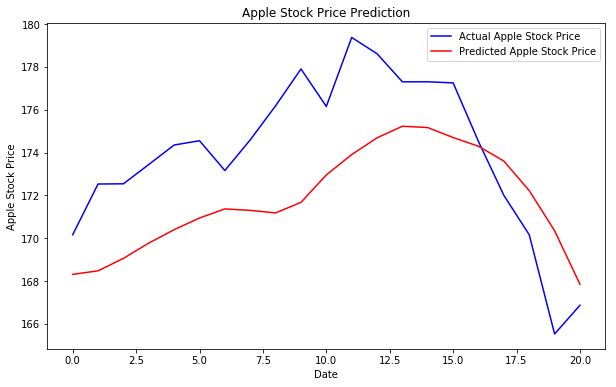

In [88]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show() 

In [89]:
forecast=predictions
truth=apple_testing_processed
diff=forecast-truth
MAPE=str(round(abs(diff/truth).mean()*100,2))+'%'
MAPE

'1.8%'